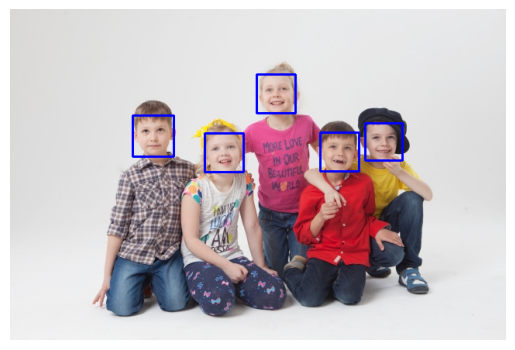

In [14]:
# ライブラリのインポート
import cv2
import matplotlib.pyplot as plt

# 1. 画像の読み込み
# OpenCVは標準で「BGR(青・緑・赤)」の順でデータを読み込みます
image_bgr = cv2.imread("./../../data/image_processing/face.jpg")

# 2. 色空間の変換 (BGR → RGB)
# Matplotlibで表示する場合、RGB順である必要があるため変換します
# これを忘れると、顔の色が青白く（ゾンビのように）表示されます
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 3. カスケードファイルの準備
# 顔の「特徴パターン」が記録された学習済みXMLファイルを指定します
cascade_file = "./../../data/image_processing/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 4. 顔認識の実行
# detectMultiScaleは、画像内から顔を探して「x座標, y座標, 幅, 高さ」のリストを返します
# 例: [[100, 50, 80, 80]] -> 1つ顔が見つかったという意味
face_list = cascade.detectMultiScale(image)

# 5. 認識した部分に枠を描画
# 枠の色（RGBで指定）。(255, 0, 0)なら赤、(0, 0, 255)なら青です。
color = (0, 0, 255)

# 顔が認識されたら実行
if len(face_list) > 0:
    for face in face_list:
        x, y, w, h = face
        cv2.rectangle(image, (x,y), (x+w, y+h), color, thickness=2)
else:
    print("顔が認識できませんでした。")

# ビジュアライズ
# 6. 結果の表示
plt.imshow(image)
plt.axis('off') # グラフの目盛りを消す（見栄えのため）
plt.show()

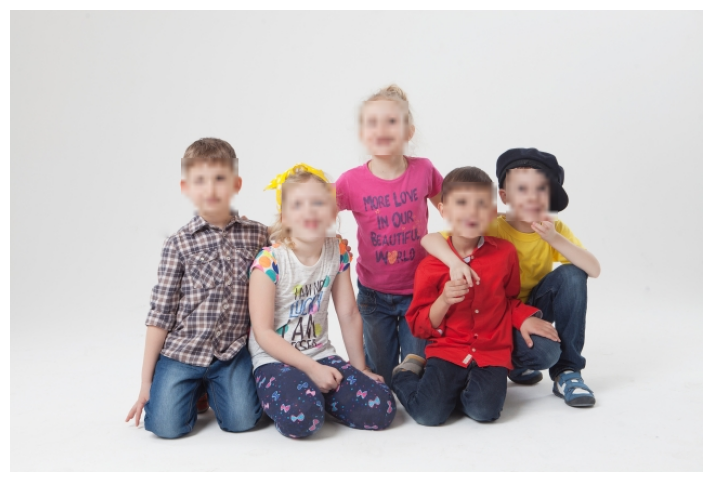

In [15]:
# 顔にモザイクをかけるためのプログラム

# ライブラリのインポート
import cv2
import matplotlib.pyplot as plt

# 1. 画像の読み込み（パスに注意）
# ./dataset/ フォルダ内の face.jpg を読み込みます
image_bgr = cv2.imread("./../../data/image_processing/face.jpg")

# 2. 色空間の変換 (OpenCVのBGRからMatplotlibのRGBへ)
# Matplotlibで表示する場合、RGB順である必要があるため変換します
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 3. カスケードファイルの準備
# 顔の「特徴パターン」が記録された学習済みXMLファイルを指定します
cascade_file = "./../../data/image_processing/haarcascade_frontalface_alt.xml"

# 4. 画像から顔を検出
# 戻り値 face_list は [x座標, y座標, 幅, 高さ] のリスト
cascade = cv2.CascadeClassifier(cascade_file)

# 5. 顔を認識し矩形にリスト化 例：[318, 84, 50, 50]
face_list = cascade.detectMultiScale(image)

# 顔が認識されたら実行
if len(face_list) > 0:
    for face in face_list:
        x, y, w, h = face
        #認識した顔を切り抜き
        face_img = image[y:y+h, x:x+w]
        # 切り抜いた画像をリサイズ
        # 縮小時: (全体) - (縮小比率) = 1 - 1/4 * 1/4 = 15/16 (93.75%の情報が失われる)
        # 拡大時: 小さくなった画像を元のサイズに無理やり引き伸ばす。
        # 結果:   消えてしまった詳細は戻らないため、隣り合うピクセルが同じ色で塗りつぶされたような「カクカクした状態（モザイク）」になります。
        face_img = cv2.resize(face_img, (w//4, h//4))
        # サイズを元に戻す
        face_img = cv2.resize(face_img, (w, h))
        # 元の画像に貼り付ける
        image[y:y+h, x:x+w] = face_img

else:
    print("顔が認識できませんでした。")

# 6. 結果の表示
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis('off') # 座標軸を非表示にする
plt.show()

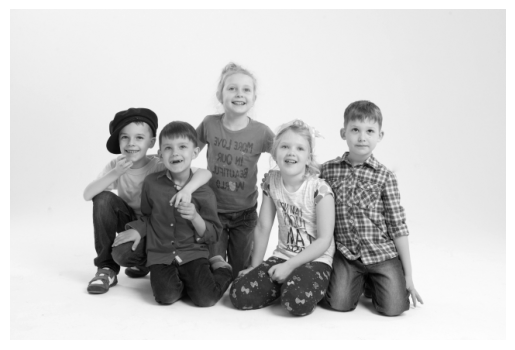

In [16]:
# 画像を左右反転

import cv2
import matplotlib.pyplot as plt

# 1. 画像ファイルを読み込む
# 第2引数を省略しているため、標準の「BGRカラー」として読み込まれます
image = cv2.imread("./../../data/image_processing/face.jpg")

# 2. 画像を反転させる
# 第2引数の「1」は左右反転（水平反転）を意味します
# ※ 0なら上下反転、-1なら上下左右（180度回転）になります
image = cv2.flip(image,1)

# 3. 画像をグレースケール（白黒）に変換する
# カラー情報（青・緑・赤）を統合して、1色の「明るさ」だけのデータにします
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 4. 処理した画像をファイルとして書き出す
# 第一引数に保存先のパス、第二引数に保存したい画像データを指定します
cv2.imwrite("./../../data/image_processing/flip-face.jpg", image)

plt.imshow(image)
plt.axis('off') # 座標軸を非表示にする
# 表示用の配色設定を「グレー」に指定
# これを指定しないと、グレースケール画像が変な色（緑っぽく）表示されることがあります
plt.gray()
plt.show()

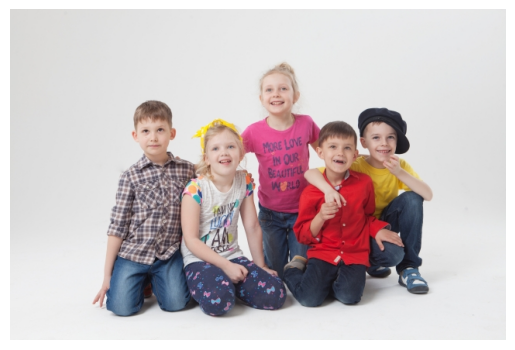

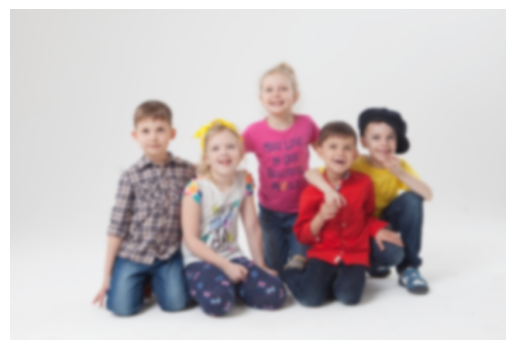

In [17]:
# 画像のスムージング（ぼかし処理）を行うプログラム

import cv2
import matplotlib.pyplot as plt

# 1. 画像ファイルを読み込む
# OpenCVは標準でBGR形式として読み込みます
image_bgr = cv2.imread("./../../data/image_processing/face.jpg")

# 2. 色空間をBGRからRGBへ変換
# Matplotlibで正しく表示するために、色の並びを整えます
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.axis('off') # 座標軸を非表示にする

# 変換した元の画像を確認のために表示
plt.imshow(image)
plt.show()

# 3. スムージング（ガウシアンフィルター）を適用する関数の定義
def blur(img):
    # cv2.GaussianBlur(入力画像, カーネルサイズ, 標準偏差)
    # (11, 11): ぼかしの範囲（カーネルサイズ）。数値が大きいほど強くぼけます。
    # 0: ガウス分布の標準偏差。0を指定すると、カーネルサイズから自動的に計算されます。
    filtered = cv2.GaussianBlur(img, (11, 11), 0)
    return filtered

# 4. 関数を実行して、画像にぼかしをかける
img_gaussian = blur(image)

plt.axis('off') # 座標軸を非表示にする

# 5. 処理後の画像を表示
plt.imshow(img_gaussian)
plt.show()

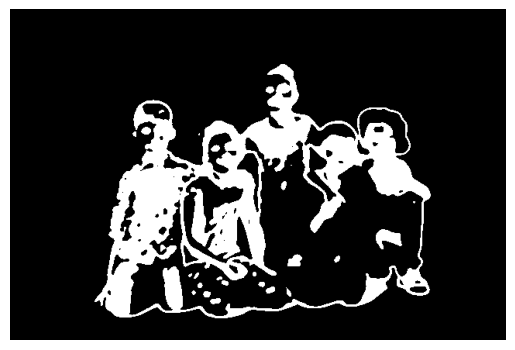

In [18]:
# 輪郭強調

import numpy as np
import cv2
import matplotlib.pyplot as plt

# 輪郭や特定の明るさを抽出する関数
def binary_threshold(img):
    # 1. グレースケールに変換
    # 2値化（白か黒か）を行うには、色の情報がない1チャンネルの画像にする必要があります
    grayed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # パラメータの設定
    under_thresh = 100  # 下限値：これより暗いと黒になる
    upper_thresh = 180  # 上限値：これより明るいと黒になる
    maxValue = 255      # 最大輝度（白）# 上限値より明るい部分を白に変換
    
    # 2. 下限値による2値化（100以上のピクセルを「白」にする）
    # THRESH_BINARY: 閾値(100)を超えたらmaxValue(255)、以下なら0
    _th, drop_back = cv2.threshold(grayed, under_thresh, maxValue, cv2.THRESH_BINARY)
    
    # 3. 上限値による2値化（180以下のピクセルを「白」にする）
    # THRESH_BINARY_INV: 閾値(180)を超えたら0、以下ならmaxValue(255)（反転処理）
    _th, clarify_born = cv2.threshold(grayed, upper_thresh, maxValue, cv2.THRESH_BINARY_INV)
    
    # 4. 2つの画像の「論理積（AND）」をとる
    # np.minimum は、2つの画像の同じ位置のピクセルを比較し、小さい方の値を採用します。
    # 結果として「100以上 かつ 180以下」のピクセルだけが白(255)として残ります。
    merged = np.minimum(drop_back, clarify_born)
    return merged

# ガウシアンフィルター後の画像（img_gaussian）に対して実行
img_bin = binary_threshold(img_gaussian)


# 結果の表示
plt.imshow(img_bin, cmap='gray') # グレースケールとして表示
plt.axis('off') 
plt.show()